In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv
from numpy.linalg import eig
import numpy as np

In [5]:
for i in range(1,2):
    display(i)


1

In [2]:
df = pd.read_csv('C:/Nesta/School/jaar 3/Ectrics 3/data_assignment1_2023.csv')

df = df.drop('Unnamed: 0', axis=1)
df

,date,gdp,ir,cpi
0,1970-01-01,1.911374,9.920000,5.526357
1,1970-04-01,1.262038,9.186666,5.437259
2,1970-07-01,1.377239,8.673333,5.275131
3,1970-10-01,1.570186,7.920000,4.971684
4,1971-01-01,0.129083,6.376667,4.854039
...,...,...,...,...
195,2018-10-01,0.583801,-0.315333,1.896263
196,2019-01-01,0.676134,-0.308533,1.221344
197,2019-04-01,0.687793,-0.317100,1.123850
198,2019-07-01,0.021201,-0.396733,1.004443


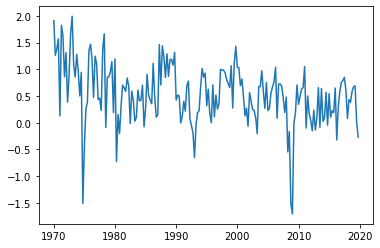

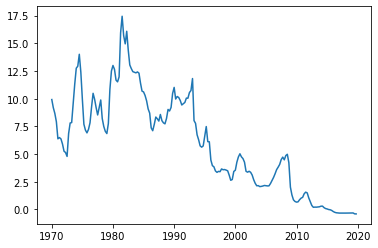

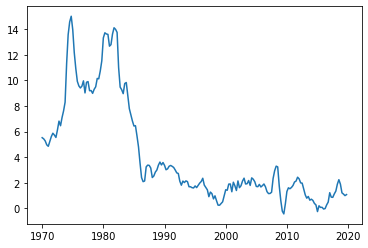

In [3]:
### plot the timeseries
df['date'] = pd.to_datetime(df['date'])

plt.plot(df.date, df.gdp, linestyle = 'solid')
plt.show()
plt.plot(df.date, df.ir, linestyle = 'solid')
plt.show()
plt.plot(df.date, df.cpi, linestyle = 'solid')
plt.show()


## need to add x and y labels still 

In [47]:
################## problem 2
# reimport the data to stop annoying issues 
df = pd.read_csv('C:/Nesta/School/jaar 3/Ectrics 3/data_assignment1_2023.csv')

df = df.drop('Unnamed: 0', axis=1)

#first transform levels to differences
## also in the assignment they take log differences for some reason and im not sure why
## I sort of doubt we are allowed to use diff but yeah lets ask

df['gdp_growth'] = df['gdp'].diff()
display(df)

# remove the first row so we have euqual number of observations
df_c = df.copy()
df_c = df_c.drop(df_c.index[0])

print(len(df_c.gdp_growth), len(df_c.ir))
df_c = df_c.reset_index(drop = True)
display(df_c)
df_c.gdp_growth

,date,gdp,ir,cpi,gdp_growth
0,1970-01-01,1.911374,9.920000,5.526357,NaN
1,1970-04-01,1.262038,9.186666,5.437259,-0.649336
2,1970-07-01,1.377239,8.673333,5.275131,0.115200
3,1970-10-01,1.570186,7.920000,4.971684,0.192947
4,1971-01-01,0.129083,6.376667,4.854039,-1.441103
...,...,...,...,...,...
195,2018-10-01,0.583801,-0.315333,1.896263,0.199896
196,2019-01-01,0.676134,-0.308533,1.221344,0.092333
197,2019-04-01,0.687793,-0.317100,1.123850,0.011658
198,2019-07-01,0.021201,-0.396733,1.004443,-0.666592


199 199


,date,gdp,ir,cpi,gdp_growth
0,1970-04-01,1.262038,9.186666,5.437259,-0.649336
1,1970-07-01,1.377239,8.673333,5.275131,0.115200
2,1970-10-01,1.570186,7.920000,4.971684,0.192947
3,1971-01-01,0.129083,6.376667,4.854039,-1.441103
4,1971-04-01,1.821987,6.490000,5.231388,1.692903
...,...,...,...,...,...
194,2018-10-01,0.583801,-0.315333,1.896263,0.199896
195,2019-01-01,0.676134,-0.308533,1.221344,0.092333
196,2019-04-01,0.687793,-0.317100,1.123850,0.011658
197,2019-07-01,0.021201,-0.396733,1.004443,-0.666592


0     -0.649336
1      0.115200
2      0.192947
3     -1.441103
4      1.692903
         ...   
194    0.199896
195    0.092333
196    0.011658
197   -0.666592
198   -0.290070
Name: gdp_growth, Length: 199, dtype: float64

In [48]:
#get Y
# let yi=1 be gdp_growth and yi=2 (I dont use the slides notation but this makes more sense)
Y = df_c[['gdp_growth', 'ir']].T
display(Y)

,0,1,2,3,4,5,6,7,8,9,...,189,190,191,192,193,194,195,196,197,198
gdp_growth,-0.649336,0.115200,0.192947,-1.441103,1.692903,-0.191385,-0.77382,0.453015,-0.925619,0.503783,...,0.064531,-0.251214,-0.517999,0.349924,-0.047863,0.199896,0.092333,0.011658,-0.666592,-0.290070
ir,9.186666,8.673333,7.920000,6.376667,6.490000,6.370000,5.91000,5.256667,5.140000,4.786667,...,-0.329633,-0.328800,-0.328300,-0.325233,-0.319500,-0.315333,-0.308533,-0.317100,-0.396733,-0.402967


In [60]:
####
# I was tired so this is chatGTP code for now so that I can continue with the next questions. Change probably and dont trust it
####


# define the window size
p = 3

# initialize an empty list to store the rows of the new dataframe
Z_rows = []

# loop through the rows of the original dataframe
for i in range(p-1, len(df_c)):
    # get the values for the current row and the previous two rows
    row = [1, df_c.loc[i, 'gdp_growth'], df_c.loc[i, 'ir'], df_c.loc[i-1, 'gdp_growth'], df_c.loc[i-1, 'ir'], df_c.loc[i-2, 'gdp_growth'], df_c.loc[i-2, 'ir']]
    # append the row to the list of rows
    Z_rows.append(row)

# create the new dataframe with the specified columns
Z_columns = ['1', 'gdp_growth_t', 'ir_t', 'gdp_growth_t-1', 'ir_t-1', 'gdp_growth_t-2', 'ir_t-2']
Z = pd.DataFrame(Z_rows, columns = Z_columns)
Z = Z.T

print(Z)

                     0         1         2         3         4         5    \
1               1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
gdp_growth_t    0.192947 -1.441103  1.692903 -0.191385 -0.773820  0.453015   
ir_t            7.920000  6.376667  6.490000  6.370000  5.910000  5.256667   
gdp_growth_t-1  0.115200  0.192947 -1.441103  1.692903 -0.191385 -0.773820   
ir_t-1          8.673333  7.920000  6.376667  6.490000  6.370000  5.910000   
gdp_growth_t-2 -0.649336  0.115200  0.192947 -1.441103  1.692903 -0.191385   
ir_t-2          9.186666  8.673333  7.920000  6.376667  6.490000  6.370000   

                     6         7         8         9    ...       187  \
1               1.000000  1.000000  1.000000  1.000000  ...  1.000000   
gdp_growth_t   -0.925619  0.503783  0.772276  0.332046  ...  0.064531   
ir_t            5.140000  4.786667  6.843333  7.803333  ... -0.329633   
gdp_growth_t-1  0.453015 -0.925619  0.503783  0.772276  ...  0.030935   
ir_t-1    

In [61]:
#get Y
# let yi=1 be gdp_growth and yi=2 (I dont use the slides notation but this makes more sense)
Y = df_c[['gdp_growth', 'ir']].T
#display(Y)

# in calculating Z we lost three more observations so modify Y

Y = Y.iloc[:, 2:]
Y.reset_index(drop = True)
Z.reset_index(drop = True)

#display(Y)
#display(Z)

# turn dataframes to matrices
Y = Y.values
Z = Z.values

# calculate B
B_hat = Y@Z.T@inv(Z@Z.T) 

display(B_hat)

array([[ 8.32667268e-17,  1.00000000e+00, -1.80411242e-16,
        -4.30211422e-16,  4.44089210e-16, -2.18575158e-16,
        -2.49800181e-16],
       [-7.10542736e-15, -2.84217094e-14,  1.00000000e+00,
        -1.77635684e-14, -1.42108547e-13, -5.32907052e-15,
         5.68434189e-14]])

In [65]:
#### check stability condition, you should do it with first making companion form so do later.
I_k = np.identity(2)


In [ ]:
####